In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline



In [2]:
df = pd.read_csv('Dataset.csv')

In [3]:
#Data Exploration
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
df.tail(2)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y
613,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [6]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [7]:
df.corr()['ApplicantIncome'].sort_values(ascending=False)

ApplicantIncome      1.000000
LoanAmount           0.570909
Credit_History      -0.014715
Loan_Amount_Term    -0.045306
CoapplicantIncome   -0.116605
Name: ApplicantIncome, dtype: float64

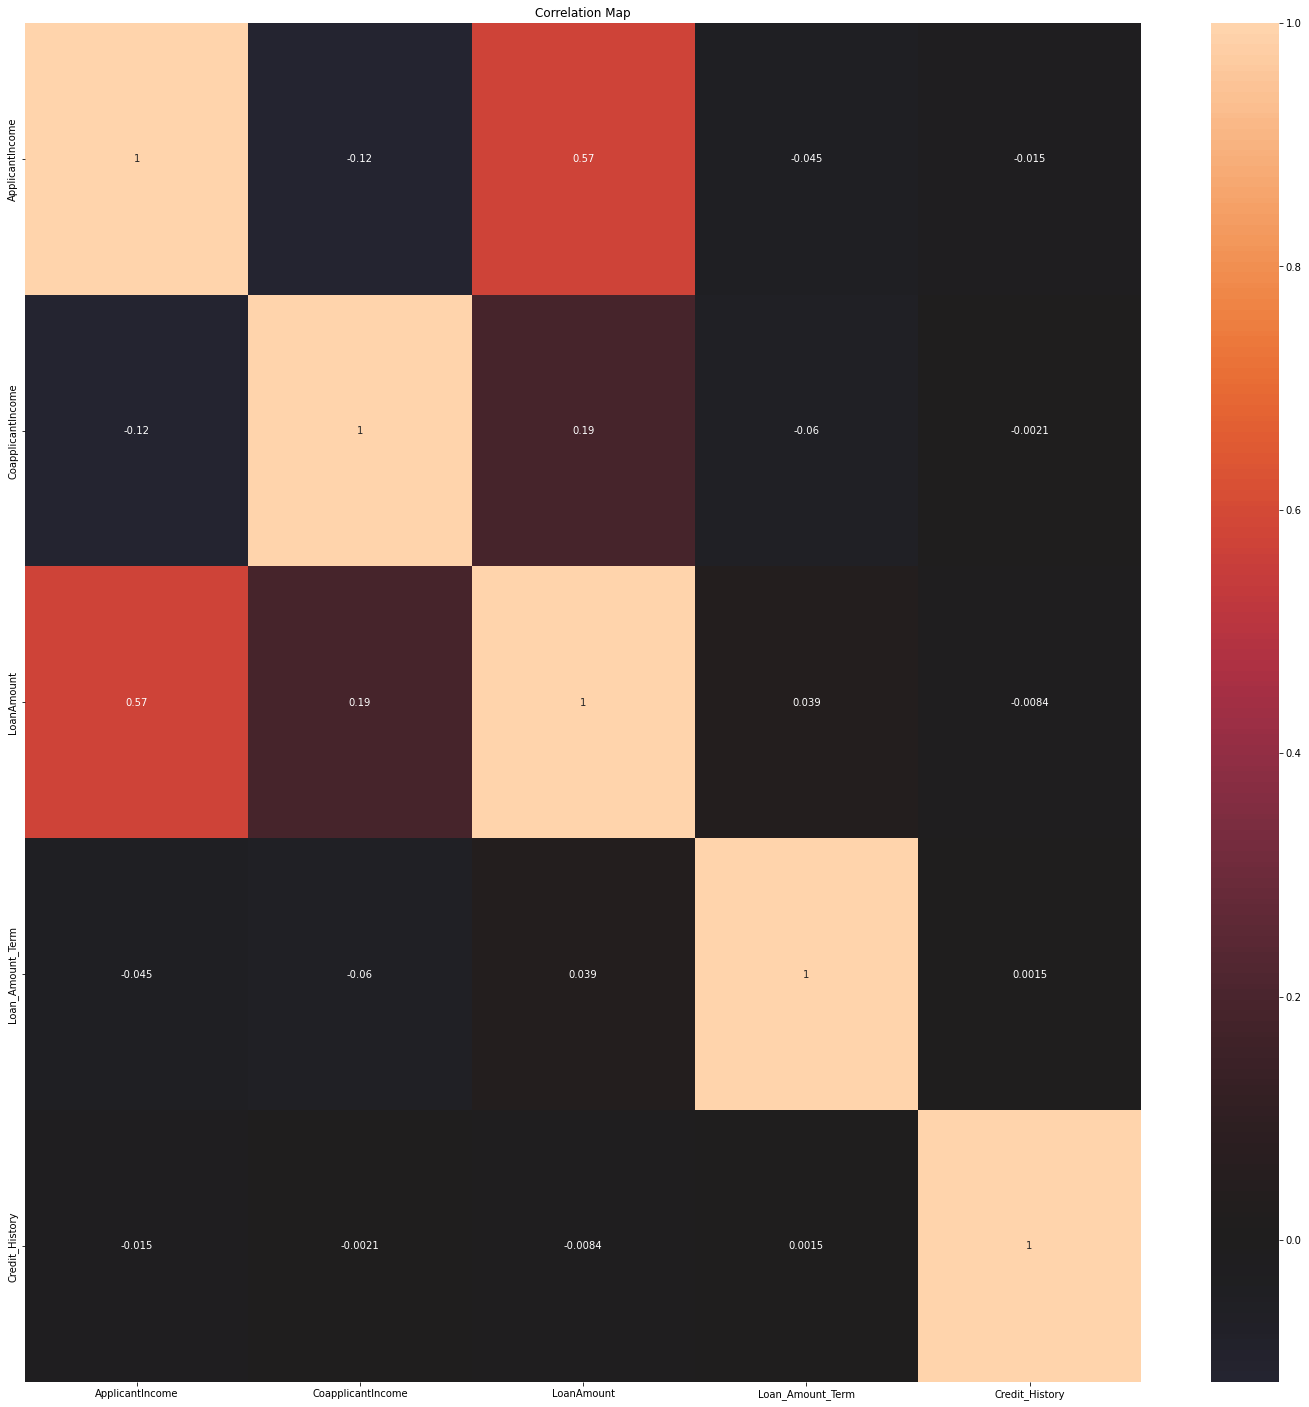

In [8]:
import seaborn as sns
plt.figure(figsize=(25,25))
sns.heatmap(df.corr(), center=0, annot=True)
plt.title("Correlation Map")
plt.show()

In [9]:
df.drop(['Loan_ID'],axis=1,inplace=True)

In [10]:
num_atr=['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','Credit_History']

cat_atr=['Gender','Married','Dependents','Education','Self_Employed','Property_Area','Loan_Status']

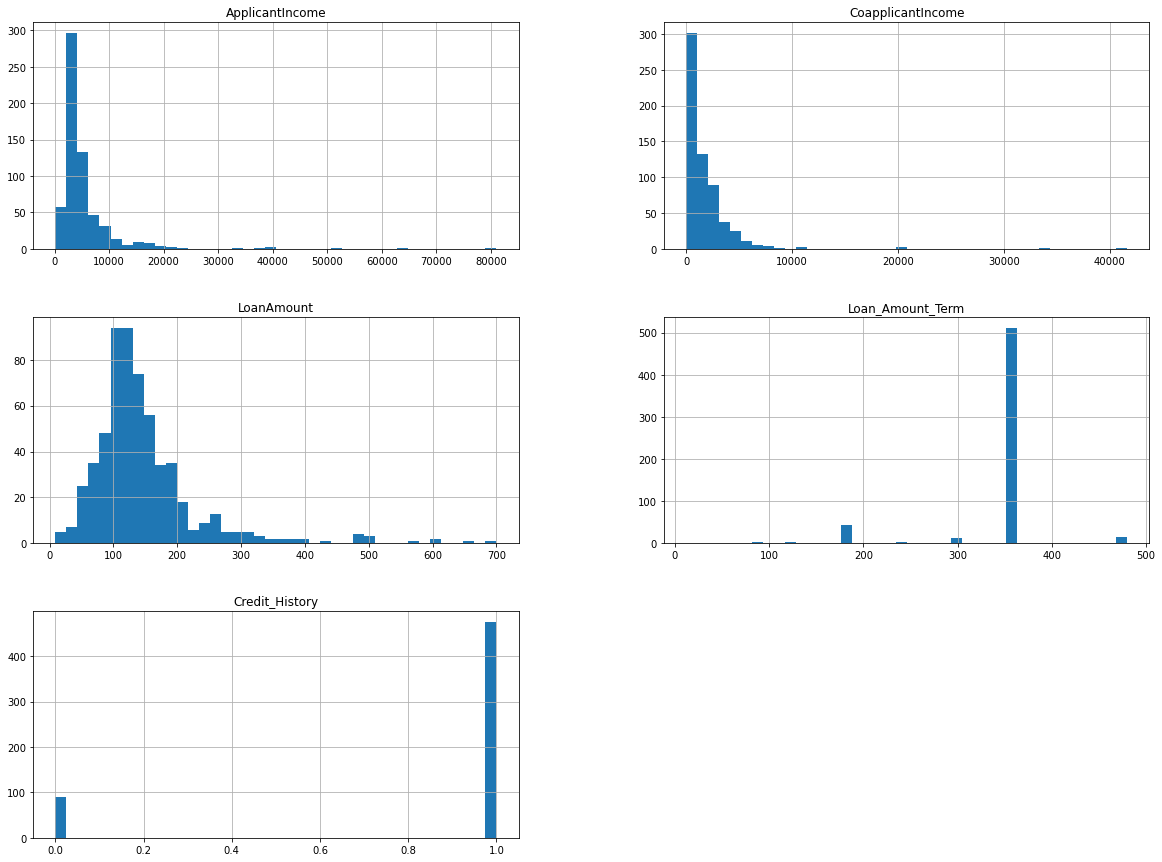

In [11]:
df[num_atr].hist(bins=40, figsize=(20,15)) 
plt.show()

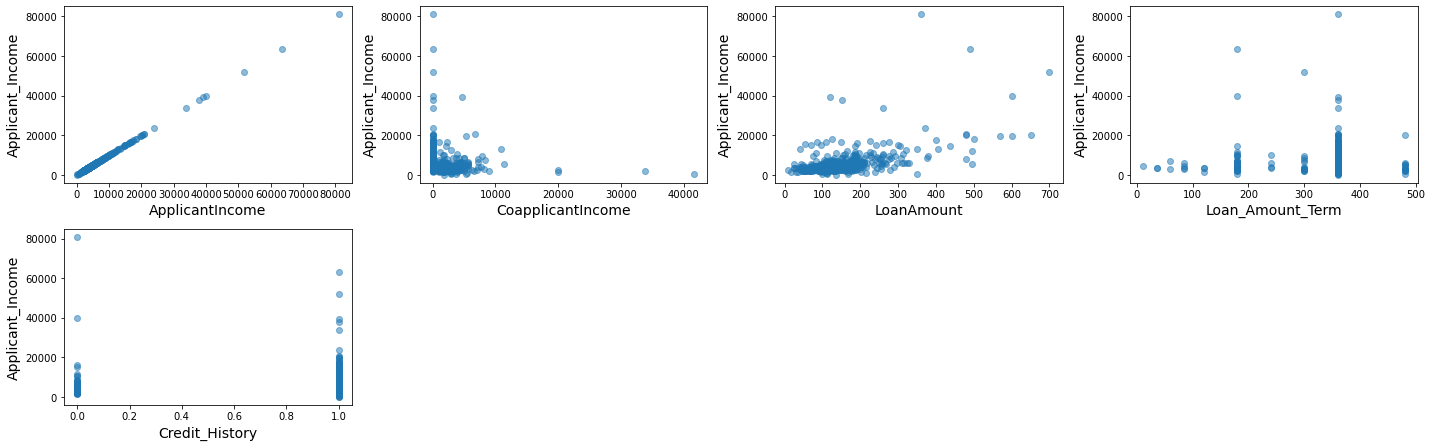

In [12]:
plt.figure(figsize=(20,12))
x=1
for i in num_atr:
    plt.subplot(4,4,x)
    plt.scatter(data=df,y='ApplicantIncome',x=i,alpha=0.5)
    plt.ylabel('Applicant_Income',fontsize=14)
    plt.xlabel(i,fontsize=14)
    plt.tight_layout()
    x=x+1

In [13]:
bins = (0, 15, np.inf)
group_names = ['low', 'high']
df['Loan_Amount_Term'] = pd.cut(df['Loan_Amount_Term'], bins = bins, labels = group_names)

num_atr.remove('Loan_Amount_Term')
num_atr.remove('ApplicantIncome')
cat_atr.append('Loan_Amount_Term')

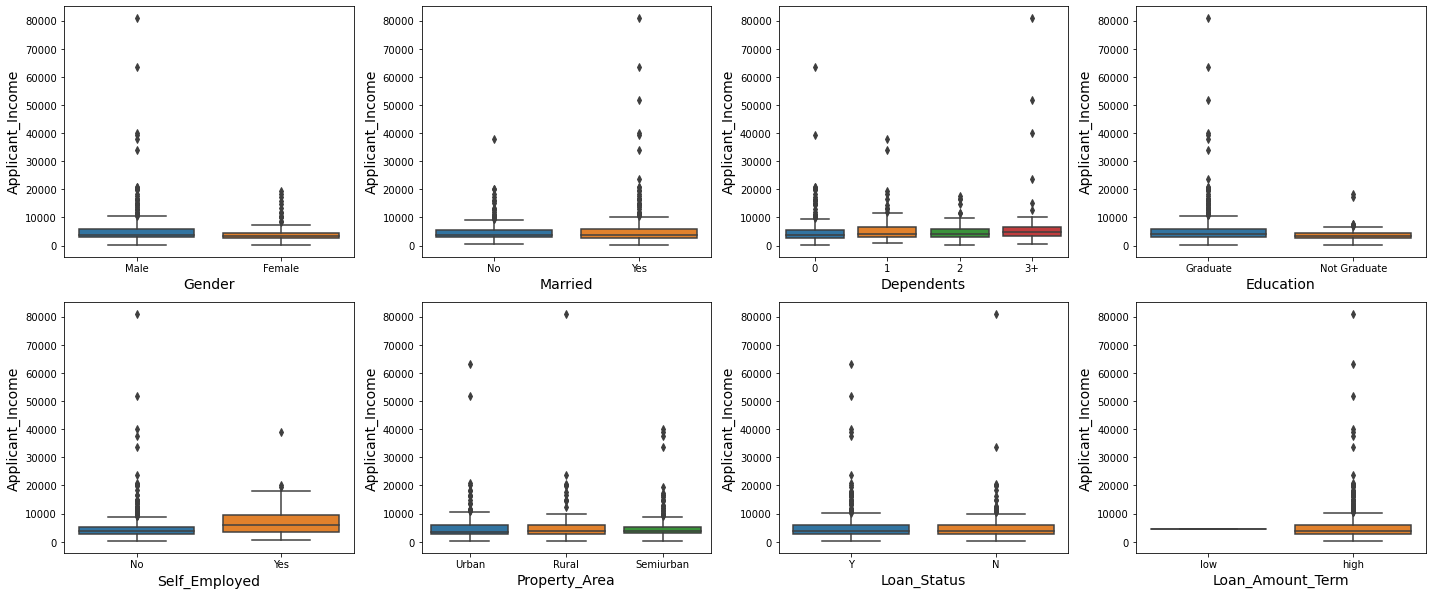

In [14]:
plt.figure(figsize=(20,12))
x=1
for i in cat_atr:
    plt.subplot(3,4,x)
    sns.boxplot(data=df,y='ApplicantIncome',x=i)
    plt.ylabel('Applicant_Income',fontsize=14)
    plt.xlabel(i,fontsize=14)
    plt.tight_layout()
    x=x+1
plt.show()

In [15]:
df.isna().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [16]:
df.dropna(inplace=True, axis=0)

In [17]:
df.isna().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [18]:
df.shape

(480, 12)

In [19]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error,r2_score 

In [20]:
from sklearn.model_selection import train_test_split
X= df.drop(['ApplicantIncome'],axis=1)
y= df['ApplicantIncome']


X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [21]:
ss = StandardScaler()
#ss.fit_transform(X_train[num_atr])
X_train[num_atr] = ss.fit_transform(X_train[num_atr])

C:\Users\NIKHIL\anaconda3\lib\site-packages\pandas\core\frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)


In [22]:
X_train[num_atr].head()

,CoapplicantIncome,LoanAmount,Credit_History
560,-0.563573,-0.465305,0.442413
75,-0.669319,-0.402065,0.442413
145,1.290911,-0.566489,0.442413
397,-0.031785,-0.629729,0.442413
319,-0.669319,0.129153,0.442413


In [23]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X_train[cat_atr] = X_train[cat_atr].apply(le.fit_transform)

C:\Users\NIKHIL\anaconda3\lib\site-packages\pandas\core\frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [24]:
X_train[cat_atr].head()

,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status,Loan_Amount_Term
560,1,1,2,1,0,1,1,0
75,1,0,0,0,0,2,0,0
145,0,1,0,0,0,1,1,0
397,1,1,0,0,0,2,1,0
319,1,1,1,0,1,0,0,0


In [25]:
#a = pd.DataFrame(X_train[cat_atr])
#b = pd.DataFrame(X_train[num_atr])
a=X_train[cat_atr]
b=X_train[num_atr]
#b = ss.transform(price[num_atr])
print (a.head())
print (b.head())
# 7.1 Horizontally concatenate now
#Xtr = np.hstack([a,b]) # It is not X_train
#Xtr.shape # (11,15)

     Gender  Married  Dependents  Education  Self_Employed  Property_Area  \
560       1        1           2          1              0              1   
75        1        0           0          0              0              2   
145       0        1           0          0              0              1   
397       1        1           0          0              0              2   
319       1        1           1          0              1              0   

     Loan_Status  Loan_Amount_Term  
560            1                 0  
75             0                 0  
145            1                 0  
397            1                 0  
319            0                 0  
     CoapplicantIncome  LoanAmount  Credit_History
560          -0.563573   -0.465305        0.442413
75           -0.669319   -0.402065        0.442413
145           1.290911   -0.566489        0.442413
397          -0.031785   -0.629729        0.442413
319          -0.669319    0.129153        0.442413


In [26]:
Xtr = pd.concat([a,b], axis=1)

In [27]:
Xtr.head()

,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status,Loan_Amount_Term,CoapplicantIncome,LoanAmount,Credit_History
560,1,1,2,1,0,1,1,0,-0.563573,-0.465305,0.442413
75,1,0,0,0,0,2,0,0,-0.669319,-0.402065,0.442413
145,0,1,0,0,0,1,1,0,1.290911,-0.566489,0.442413
397,1,1,0,0,0,2,1,0,-0.031785,-0.629729,0.442413
319,1,1,1,0,1,0,0,0,-0.669319,0.129153,0.442413


In [28]:
y_train.head()

560     3675
75      3750
145     2330
397     3033
319    10000
Name: ApplicantIncome, dtype: int64

In [29]:
from sklearn.ensemble import RandomForestRegressor
reg = RandomForestRegressor()

In [30]:
reg.fit(Xtr,y_train)

RandomForestRegressor()

In [31]:
ss = StandardScaler()
#ss.fit_transform(X_train[num_atr])
X_test[num_atr] = ss.fit_transform(X_test[num_atr])

le = LabelEncoder()
X_test[cat_atr] = X_test[cat_atr].apply(le.fit_transform)

C:\Users\NIKHIL\anaconda3\lib\site-packages\pandas\core\frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)
C:\Users\NIKHIL\anaconda3\lib\site-packages\pandas\core\frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [32]:
a=X_test[cat_atr]
b=X_test[num_atr]

In [33]:
Xtr1 = pd.concat([a,b], axis=1)

In [34]:
Xtr1.head()

,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status,Loan_Amount_Term,CoapplicantIncome,LoanAmount,Credit_History
92,1,1,2,1,0,2,1,0,0.038092,-0.761694,0.340997
529,1,0,0,1,0,1,1,0,-0.522128,-0.174957,0.340997
505,1,1,2,0,0,0,1,0,0.837174,1.178130,0.340997
358,1,1,0,1,0,2,0,0,-0.009312,-0.534183,-2.932576
512,1,1,2,0,0,2,1,0,0.104271,0.040579,0.340997


In [35]:
reg.predict(Xtr1)

array([ 2327.73 ,  3843.42 ,  5846.08 ,  2466.08 ,  3475.78 ,  3221.03 ,
        3060.31 ,  2722.92 ,  2650.85 ,  3464.43 ,  3876.53 ,  3131.67 ,
        1824.05 ,  3915.85 ,  3105.56 ,  3221.42 ,  4644.53 ,  3695.46 ,
        3357.65 , 10209.79 , 15007.93 ,  3777.02 ,  3209.35 ,  7550.16 ,
        2862.21 ,  3133.65 ,  6006.06 , 12473.89 ,  3952.02 ,  2928.63 ,
        3505.39 ,  3360.03 , 19854.81 ,  3293.13 ,  9234.405, 12236.59 ,
        9793.778,  3366.78 , 19047.58 ,  3306.61 ,  2836.2  ,  3889.22 ,
       11406.41 , 17743.   ,  3713.82 ,  3146.66 ,  3489.09 ,  3123.56 ,
        2338.47 ,  4539.05 ,  2252.85 ,  3704.94 ,  4062.87 ,  8993.95 ,
        3263.9  ,  3157.23 ,  2558.65 ,  3453.66 ,  9268.94 ,  7384.05 ,
        3038.46 , 14101.05 ,  3892.12 , 29797.56 ,  8038.57 ,  3059.92 ,
        2843.52 ,  2624.56 ,  4832.41 ,  4781.85 ,  3590.85 ,  2861.24 ,
        4360.41 ,  5495.05 ,  7109.27 ,  3726.55 ,  3930.94 ,  3695.08 ,
        4096.95 ,  2967.57 ,  6107.21 ,  4192.98 , 

In [36]:
from sklearn.model_selection import cross_val_score

In [37]:
def initial_check(model,X_train,y_train):
    rmse_score=cross_val_score(model,X_train,y_train,scoring='neg_mean_squared_error',cv=10)
    r2_score=cross_val_score(model,X_train,y_train,scoring='r2',cv=10)
    print("RMSE (cross_val_score): ",np.sqrt(-rmse_score).mean())
    print("R2 Score (cross_val_score): ",r2_score.mean())
    

In [38]:
initial_check(reg,Xtr,y_train)

RMSE (cross_val_score):  5338.574113541609
R2 Score (cross_val_score):  -0.15238056298812433


In [39]:
X_test.shape

(144, 11)

In [40]:
y_test.shape

(144,)

In [41]:
Xtr1.shape

(144, 11)

In [42]:
initial_check(reg,Xtr1,y_test)

RMSE (cross_val_score):  2416.6034479125133
R2 Score (cross_val_score):  0.16547397202190567
